In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dog-breed-image-dataset/dataset/Beagle/Beagle_30.jpg
/kaggle/input/dog-breed-image-dataset/dataset/Labrador_Retriever/Labrador Retriever_34.jpg
/kaggle/input/dog-breed-image-dataset/dataset/Golden_Retriever/Golden Retriever_47.jpg
/kaggle/input/dog-breed-image-dataset/dataset/German_Shepherd/German Shepherd_84.jpg
/kaggle/input/dog-breed-image-dataset/dataset/Rottweiler/Rottweiler_39.jpg
/kaggle/input/dog-breed-image-dataset/dataset/Poodle/Poodle_15.jpg
/kaggle/input/dog-breed-image-dataset/dataset/Bulldog/Bulldog_25.jpg
/kaggle/input/dog-breed-image-dataset/dataset/Boxer/Boxer_77.jpg
/kaggle/input/dog-breed-image-dataset/dataset/Yorkshire_Terrier/Yorkshire Terrier_34.jpg
/kaggle/input/dog-breed-image-dataset/dataset/Dachshund/Dachshund_33.jpg


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

2024-07-02 09:53:29.038648: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-02 09:53:29.038723: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-02 09:53:29.040237: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
labels = ["Beagle","Labrador_Retriever","Golden_Retriever","German_Shepherd","Rottweiler","Poodle","Bulldog","Boxer","Yorkshire_Terrier","Dachshund"]
images = []
classes = []
for label in labels:
    lst = []
    for file in os.listdir("/kaggle/input/dog-breed-image-dataset/dataset/"+label):
        img = Image.open("/kaggle/input/dog-breed-image-dataset/dataset/"+str(label)+"/"+str(file))
        img = img.resize((256,256))
        arr = np.array(img)
        images.append(arr)
        classes.append(label)
images = np.array(images)
classes = np.array(classes)

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
classes = le.fit_transform(classes)
classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [5]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images,classes, test_size=0.2, random_state=42)

In [6]:
model = Sequential()
model.add(Conv2D(128,kernel_size=(3,3),input_shape=(256,256,3), activation='relu'))
model.add(MaxPooling2D(3,3))
model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(3,3))
model.add(Conv2D(32,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(3,3))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(labels), activation='softmax'))
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 84, 84, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 82, 82, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 27, 27, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       204,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301,750 (1.15 MB)

 Trainable params: 301,750 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
eval = model.fit(X_train, y_train, epochs = 32,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/32
 2/25 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.0938 - loss: 74.6175 

I0000 00:00:1719914032.755069     992 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1719914032.772655     992 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.1021 - loss: 23.3614

W0000 00:00:1719914039.969362     993 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1719914040.790634     993 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 387ms/step - accuracy: 0.1028 - loss: 22.8231 - val_accuracy: 0.2062 - val_loss: 2.1887
Epoch 2/32
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.1955 - loss: 2.1642 - val_accuracy: 0.2887 - val_loss: 1.8374
Epoch 3/32
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.4147 - loss: 1.6808 - val_accuracy: 0.6237 - val_loss: 1.2274
Epoch 4/32
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.6547 - loss: 1.0583 - val_accuracy: 0.7371 - val_loss: 0.8908
Epoch 5/32
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.7498 - loss: 0.8222 - val_accuracy: 0.8041 - val_loss: 0.7371
Epoch 6/32
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.8429 - loss: 0.5786 - val_accuracy: 0.8866 - val_loss: 0.3882
Epoch 7/32
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.8964 - loss: 0.3521 - val_accuracy: 0.9536 - val_loss: 0.1758
Epoch 8/32
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.9568 - loss: 0.1955 - val_accuracy: 0.9639 - val_loss:

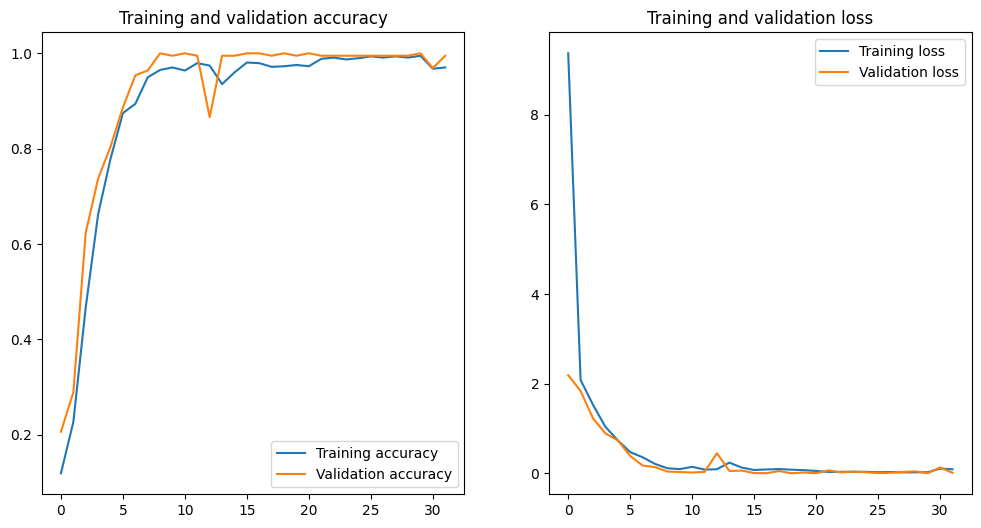

In [9]:
# Plot accuracy and loss
def plot_accuracy_and_loss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training accuracy')
    plt.plot(epochs, val_acc, label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    plt.show()

plot_accuracy_and_loss(eval)


4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step 

W0000 00:00:1719914107.718322     991 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


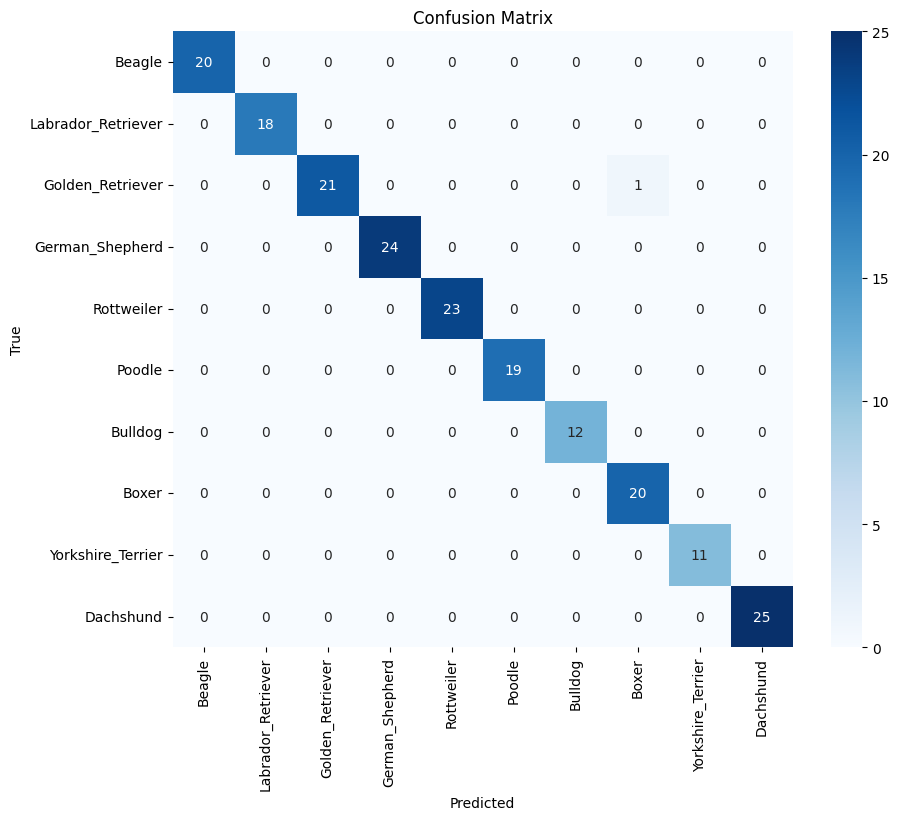

Classification Report:
                    precision    recall  f1-score   support

            Beagle       1.00      1.00      1.00        20
Labrador_Retriever       1.00      1.00      1.00        18
  Golden_Retriever       1.00      0.95      0.98        22
   German_Shepherd       1.00      1.00      1.00        24
        Rottweiler       1.00      1.00      1.00        23
            Poodle       1.00      1.00      1.00        19
           Bulldog       1.00      1.00      1.00        12
             Boxer       0.95      1.00      0.98        20
 Yorkshire_Terrier       1.00      1.00      1.00        11
         Dachshund       1.00      1.00      1.00        25

          accuracy                           0.99       194
         macro avg       1.00      1.00      1.00       194
      weighted avg       1.00      0.99      0.99       194



In [10]:
# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=labels))


In [17]:
# Function to load and preprocess the image
def load_and_preprocess_image(img_path):
    img = Image.open(img_path)
    img = img.resize((256, 256))
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalizing the image array
    return img_array

# Function to make a prediction and print the class
def predict_image_class(img_path, model, classes):
    img_array = load_and_preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_label = classes[predicted_class_index]
    confidence = np.max(predictions) * 100

    print(f'Predicted class: {predicted_class_label} with confidence: {confidence:.2f}%')

# Example usage
img_path = '/kaggle/input/dog-breed-image-dataset/dataset/Poodle/Poodle_100.jpg'
predict_image_class(img_path, model, labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Bulldog with confidence: 12.60%
